교수님이 공유해주신 vertebrate.csv로 공부하는데 데이터가 너무 적어서 
iris 이용하여 공부해봤습니다.

최근접 이웃 분류 모델은 입력값에 대한 결과값을 예측할 때 
훈련 데이터셋에서 가장 가까운 최근접 이웃 을 찾아 예측에 사용한다. 
입력한 속성값과 가장 거리가 가까운 k개의 관측치를 통해 결과를 예측할 수 있고 많이 조정할 필요 없이 좋은 성능을 발휘한다

아이리스 품종(3가지)을 분류하는 다중 분류 문제

데이터 준비하기


In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense

data=pd.read_csv('/content/drive/MyDrive/김영희/Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


데이터셋 생성하기 - 입력(속성값 4개)와 출력(판정결과 1개) 변수로 분리

In [2]:
X = data.iloc[:, 1:5] #속성
y = data.iloc[:, 5] #답

print(y)

print(set(y))


0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object
{'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'}


레이블을 범주형 형태로 변경 

In [3]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

encoder = LabelEncoder()
encoder.fit(y)
Y_encodered = encoder.transform(y)

print(Y_encodered)

Y = np_utils.to_categorical(Y_encodered)
#스칼라 형식으로 숫자로 만들고 그 다음 범주형으로 만들기 0->[1,0,0] 1->[0,1,0] 2->[0,0,1]


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [4]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

학습/테스트 8:2 비율로 분리 알고리즘 안쓰고 그냥 테스트 해보려고 나눔

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y
                                                    , test_size=0.2, random_state=7) #0.2한게 8:2로 나눈거임

model = KNeighborsClassifier(n_neighbors=2)
model.fit(X, Y)

print("score:%f" %model.score(x_test, y_test))


score:0.900000


위에 knn알고리즘을 사용하여 k개수를 47라고 했을 때 평가 결과 83%정도의 정확도가 나왔는데 알고리즘 안쓰고도 해볼거고 하이퍼 파라미터값을 변경해서도 해볼예정

모델 구성하기 

In [6]:
model = Sequential()

model.add(Dense(16, input_shape=(4,), activation='relu'))
model.add(Dense(3, activation='softmax')) #다중 분류 문제


모델 설정하기 

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam', #다중 분류 문제
              metrics=['accuracy'])


모델 학습하기

In [8]:
history = model.fit(x_train, y_train,
                    epochs=200, 
                    batch_size=10,
                    validation_data = (x_test, y_test)) #10개씩 200번 테스트


Epoch 1/200
12/12 [==============================] - 1s 28ms/step - loss: 2.7780 - accuracy: 0.3583 - val_loss: 2.8619 - val_accuracy: 0.2333
Epoch 2/200
12/12 [==============================] - 0s 6ms/step - loss: 2.3460 - accuracy: 0.3583 - val_loss: 2.3927 - val_accuracy: 0.2333
Epoch 3/200
12/12 [==============================] - 0s 5ms/step - loss: 1.9902 - accuracy: 0.3583 - val_loss: 1.9943 - val_accuracy: 0.2333
Epoch 4/200
12/12 [==============================] - 0s 6ms/step - loss: 1.7089 - accuracy: 0.3333 - val_loss: 1.6778 - val_accuracy: 0.1333
Epoch 5/200
12/12 [==============================] - 0s 6ms/step - loss: 1.4988 - accuracy: 0.0583 - val_loss: 1.4414 - val_accuracy: 0.0333
Epoch 6/200
12/12 [==============================] - 0s 9ms/step - loss: 1.3318 - accuracy: 0.0000e+00 - val_loss: 1.2905 - val_accuracy: 0.0000e+00
Epoch 7/200
12/12 [==============================] - 0s 8ms/step - loss: 1.2221 - accuracy: 0.0000e+00 - val_loss: 1.1844 - val_accuracy: 0.0333


학습결과 그리기

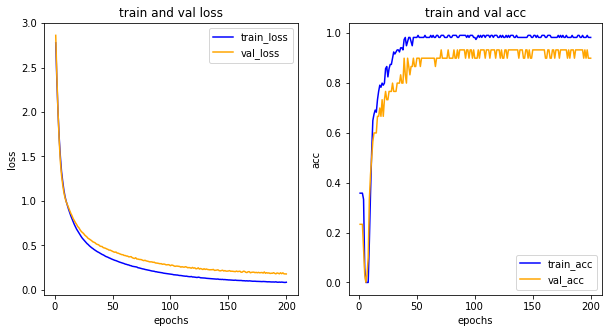

In [9]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['accuracy']
val_acc = his_dict['val_accuracy']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()


모델 평가하기

In [10]:
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))


1/1 [==============================] - 0s 154ms/step - loss: 0.1794 - accuracy: 0.9000
accuracy: 90.00%


knn알고리즘 안쓰고 한게 더 높게 평가 나왔음 
하이퍼 파라미터값을 변경해서 해보겠음

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn import neighbors
k_range = range(1,20)
k_scores=[]

for k in k_range:
  knn = neighbors.KNeighborsClassifier(k)
  scores = cross_val_score(knn, x_train,y_train,cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

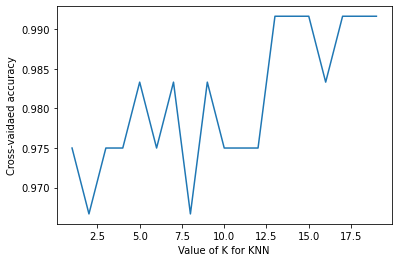

In [12]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-vaidaed accuracy')
plt.show()

K를 15로 설정하고 돌려보겠음 

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X, Y)

print("score:%f" %model.score(x_test, y_test))

score:0.966667
